In [5]:
#for loading files
import os
import glob
import pandas as pd

#for data manipulation
import numpy as np
import itertools

#for visualization
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context('talk', font_scale=0.7)

In [6]:
"""Task 1: Develop a simple comparative analysis (e.g. yearly, quarterly, monthly) of different costs (TOC). 
#What trends do you see across different account groups (e.g. Depreciation's, People costs, etc.)."""


# ----------- Loading data ----------
# Operational cost data
path_TCO = os.getcwd() + "/DTO/Total_Operating_Costs/Actual_Costs" #Find the csv files in the working directory, 
files_TCO = glob.glob(path_TCO + "/*.csv") #loop through all csv files in folder
df_TCO = pd.concat(map(lambda file: pd.read_csv(file, sep=";"), files_TCO)) #read as panda dataframes and concatenate.

## Employees data
path_employees = os.getcwd() + "/DTO/Employee_data/DTO_EMPLOYEES_REA_2018_C.csv"
df_employees = pd.read_csv(path_employees, sep=",")

# Account data
path_accounts = os.getcwd() + "/Master_Data/DIM_MASTER_ACCOUNTGROUPS.csv"
df_accounts = pd.read_csv(path_accounts, sep=";")

# Organisation data
path_organisation = os.getcwd() + "/Master_Data/DIM_MASTER_ORGANISATION.csv"
df_org = pd.read_csv(path_organisation, sep=";")


# ----------- Preparing data ----------
#renaming
df_TCO = df_TCO.rename(index=str, columns={"Account number": "AccountNumber", "Value DKK": "ValueDKK", "Cost Center":"CostCenter"})
df_accounts = df_accounts.rename(index=str, columns={"Account 2-digits": "AccountCode", "Account Type":"AccountType", "Account Group":"AccountGroup"})
df_org = df_org.rename(index=str, columns={"Location Code": "LocationCode", "Department Number": "DepartmentNumber", "Cost Center":"CostCenter"})

#changing type to allow mathematical operations
df_TCO["ValueDKK"]=df_TCO["ValueDKK"].str.replace(',','.')
df_TCO["ValueDKK"]= df_TCO["ValueDKK"].astype(float).astype(int) #loses some precision but allows easier operations

#filling in blanks/NaN


# ----------- Displaying data ----------
display(df_TCO)
#display(df_employees)
display(df_accounts)
#display(df_org)

,AccountNumber,Year,Month,ValueDKK,CostCenter
0,CCNN/20101000,K4/2018,7,1322704,435
1,CCNN/20101000,K4/2018,8,1322704,435
2,CCNN/20101000,K4/2018,9,1322704,435
3,CCNN/20101000,K4/2018,10,1322704,435
4,CCNN/20101000,K4/2018,11,1322704,435
...,...,...,...,...,...
65530,CCNN/24241000,K4/2020,4,20235,565
65531,CCNN/24241000,K4/2020,5,20235,565
65532,CCNN/24241000,K4/2020,6,20235,565
65533,CCNN/23104000,K4/2020,1,67450,565


,AccountCode,AccountType,AccountGroup
0,20,Salaries-1,People
1,21,Salaries-2,People
2,22,Pension & Bonus & Ad Hoc PayOuts,People
3,23,Raw Materials,Manufacturing
4,24,Price Variation,Manufacturing
5,27,Price Adjustments,Manufacturing
6,28,Transport-Road,Manufacturing
7,30,Shipment,Manufacturing
8,31,Safety,Manufacturing
9,32,Depreciation-Building,Other Costs


In [3]:
# ----------- Overview of data ----------
unique_values_TCO = df_TCO.nunique()
unique_values_accounts = df_accounts.nunique()
unique_values_org = df_org.nunique()
#print("Number of unique values in each column:\n", unique_values_TCO, "\n")
#print("Number of unique values in each column:\n", unique_values_accounts, "\n")
#print("Number of unique values in each column:\n", unique_values_org, "\n")


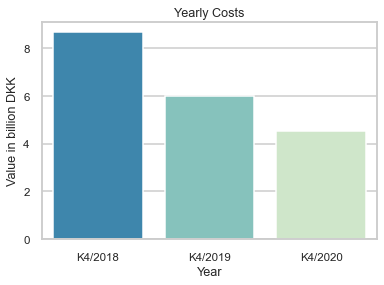

In [4]:
#Barplot of costs per year
yearly_costs = df_TCO.groupby(['Year']).sum()

ax1 = sns.barplot(x = yearly_costs.index, y = yearly_costs.ValueDKK.div(1000000000), data = yearly_costs, 
palette = "GnBu_r")
ax1.set(ylabel='Value in billion DKK')
plt.title('Yearly Costs')

plt.show()

,Month,Year,ValueDKK,CostCenter
0,1,K4/2018,76357865,4147645
1,1,K4/2019,644776801,10996214
2,1,K4/2020,727878088,4129986
3,2,K4/2018,37963830,4057589
4,2,K4/2019,778542552,10713453
5,2,K4/2020,759485915,4119556
6,3,K4/2018,941036496,4049799
7,3,K4/2019,728056303,10279422
8,3,K4/2020,746570563,4099181
9,4,K4/2018,762384992,4118906


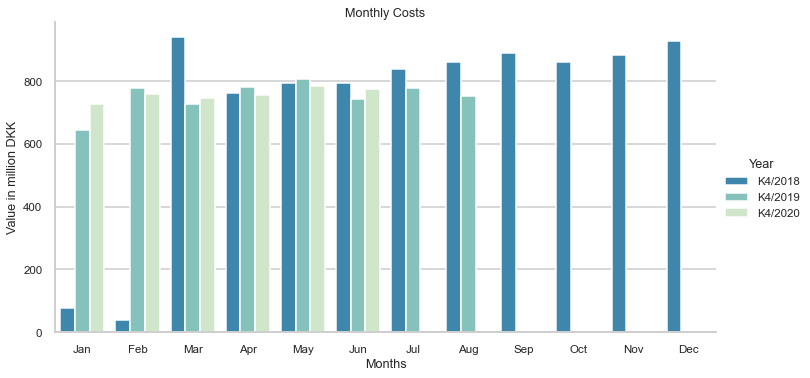

In [104]:
#Histogram of costs per month and year
monthly_costs = df_TCO.groupby(['Month', 'Year']).sum()
monthly_costs = monthly_costs.reset_index() #to get month as a column and not index

display(monthly_costs)

months_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2 = sns.catplot(x='Month', y=monthly_costs.ValueDKK.div(1000000), hue='Year', data = monthly_costs, kind="bar", ci=None,
                 palette = "GnBu_r", aspect=2)
ax2.set(xlabel='Months', ylabel='Value in million DKK')
ax2.set_xticklabels(months_name)
plt.title('Monthly Costs')

plt.show()

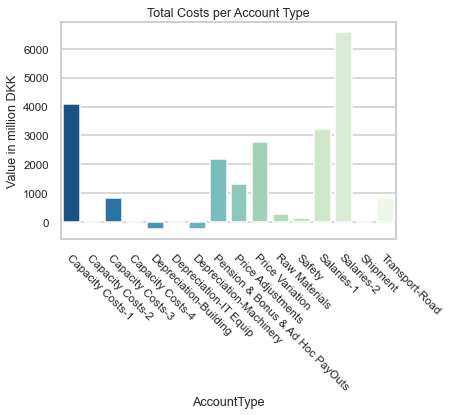

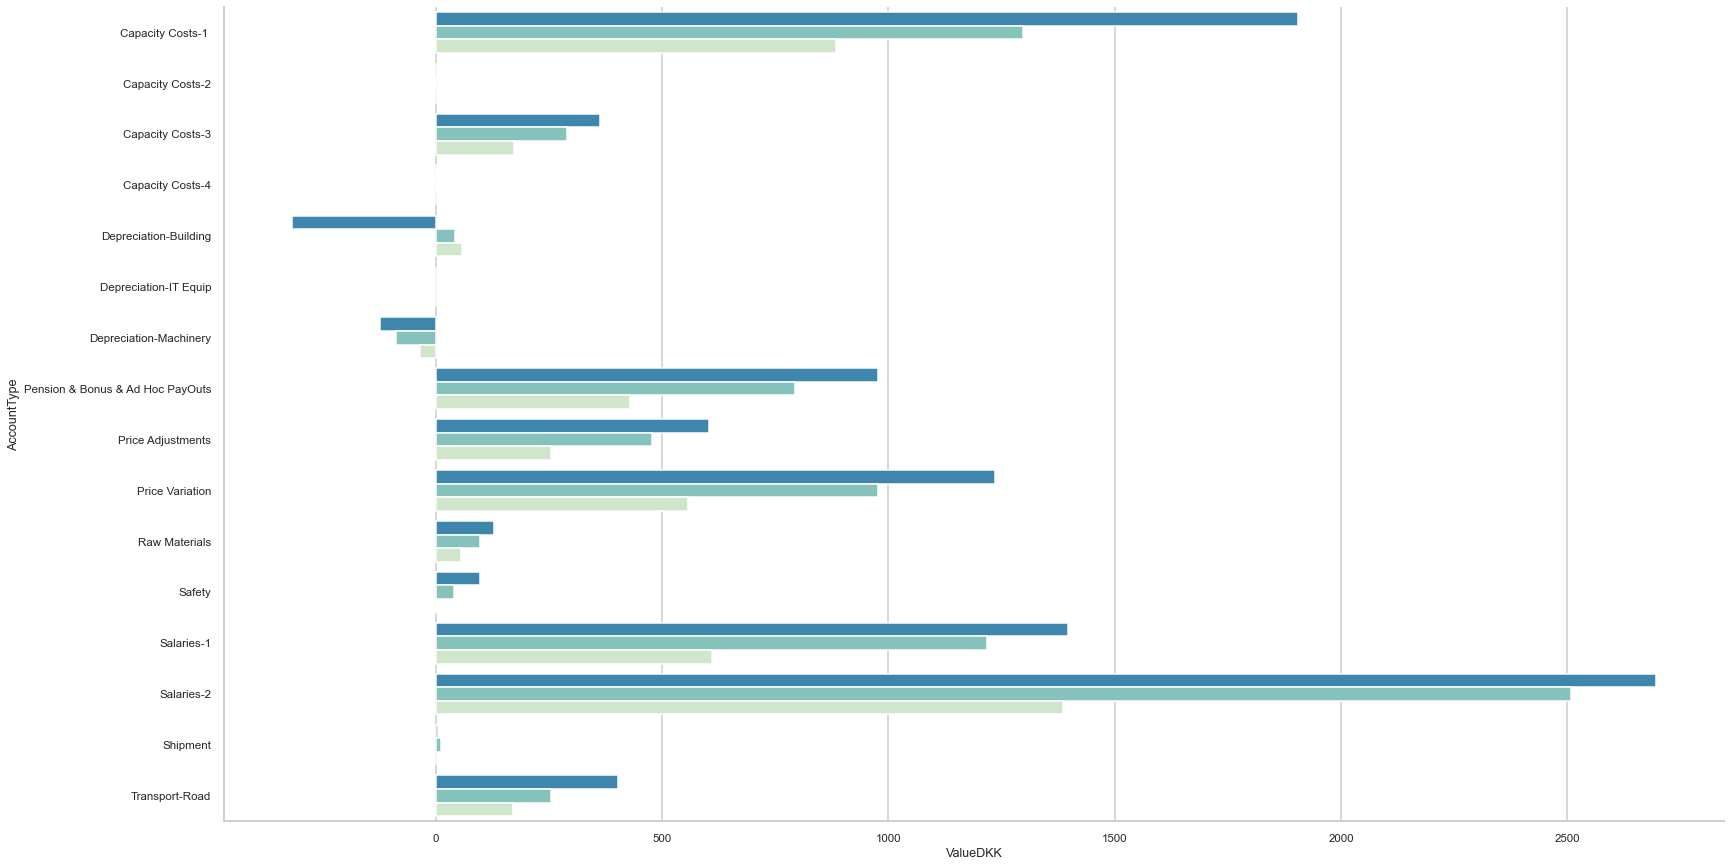

In [50]:
#Costs per account number group
df2 = df_TCO
df2['AccountCode'] = np.int64(df2['AccountNumber'].str[5:7])  #makes a new column with the code for account categories
df2 = pd.merge(df2, df_accounts, on='AccountCode')   #merge tables on the account codes to get columns for account type and group


#----------- Account type dataframes ------------
df_AccountType = df2.groupby(['AccountType']).sum()
df_AccountGroup = df2.groupby(['AccountGroup']).sum()
df_AccountType_yearly = df2.groupby(['AccountType', 'Year']).sum()
df_AccountGroup_yearly = df2.groupby(['AccountGroup', 'Year']).sum()


#----------- Category plot of costs per type ------------

ax3 = sns.barplot(x = df_AccountType.index, y = df_AccountType.ValueDKK.div(1000000), data = df_AccountType, palette = "GnBu_r")
ax3.set(ylabel='Value in million DKK')
plt.xticks(rotation = -45, ha="left", rotation_mode="anchor")
plt.title('Total Costs per Account Type')

df_AccountType_yearly = df_AccountType_yearly.reset_index()


#----------- Category plot of costs per year and type ------------
try:
    ax4 = sns.catplot(y='AccountType', x=df_AccountType_yearly.ValueDKK.div(1000000), hue='Year', data = df_AccountType_yearly, kind="bar",
                     palette = "GnBu_r", aspect=2, height = 12)
    ax4.set(xlabel='Months', ylabel='Value in million DKK')
    plt.title('Yearly Costs per Account Type')

except ValueError:
    pass


plt.show()

Number of employees in 6/1/2020: 8991


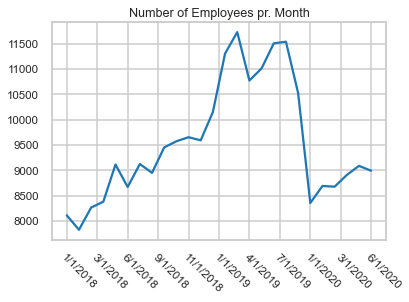

In [73]:
### 2) How many  employees work for the Organisation. Do you see any interesting trends?

#-------------- Number of employees in recent month -----------
n_employees = df_employees.iloc[: , -1].sum().astype(int) #sum employees from the most recent month (lst column)
print("Number of employees in {0}: {1}".format(df_employees.keys()[-1], n_employees))


c
# TODO: sum all columns and analyse development of number of employees.
df_total_employees = df_employees.sum()[1::]

ax5 = sns.lineplot(data=df_total_employees)
ax5.xaxis.set_major_locator(plt.MaxNLocator(len(df_total_employees)/2))
plt.xticks(rotation = -45, ha="left", rotation_mode="anchor")
plt.title('Number of Employees pr. Month')

plt.show()

In [105]:
### 3) Calculate Cost/Employee across the Cost Centers. Please use only People costs (account group) 
#while calculating Cost/Employee. 

#Compare the numbers across the different locations (E.g. Denmark as compared to India and Japan)
#and report at least one interesting fact.

lst_people = [20, 21, 22] #TODO: get these values from account dataframe
df_peoples_cost = df2.loc[(df2['AccountCode'].isin(lst_people))] #returns only rows with Accoutn code corrsponding to peoples cost.
display(sum_peoples_cost)

sum_people_costCenter = df2.groupby(['CostCenter'])['ValueDKK'].sum()
print(sum_people_costCenter)
#display(df_costCenter)



#print(peoples_cost)


#--------------  -----------


#-------------- Number of employees in recent month -----------


,AccountNumber,Year,Month,ValueDKK,CostCenter,AccountCode,AccountType,AccountGroup
0,CCNN/20101000,K4/2018,7,1322704,435,20,Salaries-1,People
1,CCNN/20101000,K4/2018,8,1322704,435,20,Salaries-1,People
2,CCNN/20101000,K4/2018,9,1322704,435,20,Salaries-1,People
3,CCNN/20101000,K4/2018,10,1322704,435,20,Salaries-1,People
4,CCNN/20101000,K4/2018,11,1322704,435,20,Salaries-1,People
...,...,...,...,...,...,...,...,...
133615,CCNN/22202019,K4/2020,2,938,565,22,Pension & Bonus & Ad Hoc PayOuts,People
133616,CCNN/22202019,K4/2020,3,938,565,22,Pension & Bonus & Ad Hoc PayOuts,People
133617,CCNN/22202019,K4/2020,4,938,565,22,Pension & Bonus & Ad Hoc PayOuts,People
133618,CCNN/22202019,K4/2020,5,938,565,22,Pension & Bonus & Ad Hoc PayOuts,People


CostCenter
1       70045119
2      277869731
3       12793513
4      342805175
5     -181327427
         ...    
670     29169997
671     60725520
672     10524706
673     74915051
674      4381778
Name: ValueDKK, Length: 674, dtype: int64


In [34]:
### 4) Discuss the the data transformation (Cleaning) phase and the steps you took to clean the dirty data (if any). 
#Neatly Sketch your data pipeline (architecture) in a slide.



In [ ]:
### 5) Plot suitable graphs that help you answer the listed questions. 


In [ ]:

# 
#df_months = df_TOC.groupby(['Month', 'Year']).mean().ValueDKK
#df_months = df_months.reset_index()
#df_pivot = df_months.pivot(index = 'Month', columns='Year')
#df_pivot = df_pivot.reset_index()
#display(df_pivot)

#nan_rows = df_pivot[df_pivot.isnull().any(axis=1)]
#display(nan_rows)

#find values for blanks
#df_months = df_TOC.groupby(['CostCenter','Month']).mean().ValueDKK
#df_months = df_months.reset_index()
#display(df_months)

